This notebook contains an example for teaching.

# An inferential problem: The Gender Wage Gap

In the previous lab, we already analyzed data from the March Supplement of the U.S. Current Population Survey (2015) and answered the question how to use job-relevant characteristics, such as education and experience, to best predict wages. Now, we focus on the following inference question:

What is the difference in predicted wages between men and women with the same job-relevant characteristics?

Thus, we analyze if there is a difference in the payment of men and women (*gender wage gap*). The gender wage gap may partly reflect *discrimination* against women in the labor market or may partly reflect a *selection effect*, namely that women are relatively more likely to take on occupations that pay somewhat less (for example, school teaching).

To investigate the gender wage gap, we consider the following log-linear regression model

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 D  + \beta_2' W + \epsilon,
\end{align}

where $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the
$W$'s are controls explaining variation in wages. Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of men and women.

## Data Analysis

We consider the same subsample of the U.S. Current Population Survey (2015) as in the previous lab. Let us load the data set.



In [1]:
using Pkg


#Pkg.add("DataFrames")
#Pkg.add("Dates")
#Pkg.add("Plots")
#Pkg.add("CategoricalArrays")

using RData, LinearAlgebra, GLM, DataFrames, Statistics, Random, Distributions, 
DataStructures, NamedArrays, PrettyTables, StatsModels, Combinatorics, Plots, CategoricalArrays

In [2]:
rdata_read = load("../../../data/wage2015_subsample_inference.RData")
data = rdata_read["data"]
names(data)
println("Number of Rows : ", size(data)[1],"\n","Number of Columns : ", size(data)[2],) #rows and columns

Number of Rows : 5150
Number of Columns : 20


***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

In [3]:
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,wage,23.4104,3.02198,19.2308,528.846,0,Float64
2,lwage,2.97079,1.10591,2.95651,6.2707,0,Float64
3,sex,0.444466,0.0,0.0,1.0,0,Float64
4,shs,0.023301,0.0,0.0,1.0,0,Float64
5,hsg,0.243883,0.0,0.0,1.0,0,Float64
6,scl,0.278058,0.0,0.0,1.0,0,Float64
7,clg,0.31767,0.0,0.0,1.0,0,Float64
8,ad,0.137087,0.0,0.0,1.0,0,Float64
9,mw,0.259612,0.0,0.0,1.0,0,Float64


In [4]:
data = filter(row -> (row.scl == 1) | (row.clg == 1), data)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11.7308,2.46222,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,19.2308,2.95651,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,12.0192,2.48651,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,13.4615,2.59984,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,16.3462,2.79399,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,8.65385,2.158,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Plots section

In [5]:
#Pkg.add("StatsPlots")
using StatsPlots

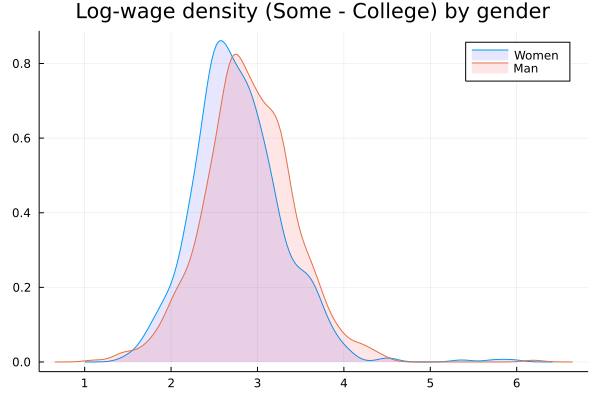

In [6]:
data1 = filter(row -> (row.sex == 1) & (row.scl == 1), data)
data2 = filter(row -> (row.sex == 0) & (row.scl == 1), data)

density(data1[!,:lwage], fill=(0, .1,:blue), label ="Women")
density!(data2[!,:lwage], fill=(0, .1,:red), label ="Man")
plot!(title="Log-wage density (Some - College) by gender")

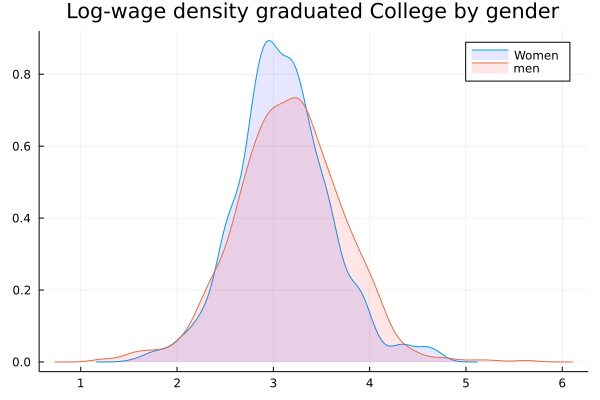

In [7]:
data1 = filter(row -> (row.sex == 1) & (row.clg == 1), data)
data2 = filter(row -> (row.sex == 0) & (row.clg == 1), data)

density(data1[!,:lwage],fill=(0, .1,:blue), label ="Women")
density!(data2[!,:lwage],fill=(0, .1,:red), label ="men")
plot!(title="Log-wage density graduated College by gender")

To start our (causal) analysis, we compare the sample means given gender:

In [9]:
Z = select(data, ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"])

data_female = filter(row -> row.sex == 1, data)
Z_female = select(data_female,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

data_male = filter(row -> row.sex == 0, data)
Z_male = select(data_male,["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] )

means = DataFrame( variables = names(Z), All = describe(Z, :mean)[!,2], Men = describe(Z_male,:mean)[!,2], Female = describe(Z_female,:mean)[!,2])


,variables,All,Men,Female
,String,Float64,Float64,Float64
1,lwage,3.00002,3.03841,2.9569
2,sex,0.470991,0.0,1.0
3,shs,0.0,0.0,0.0
4,hsg,0.0,0.0,0.0
5,scl,0.466754,0.481824,0.449827
6,clg,0.533246,0.518176,0.550173
7,ad,0.0,0.0,0.0
8,ne,0.226532,0.219347,0.234602
9,mw,0.265971,0.261245,0.27128


In particular, the table above shows that the difference in average logwage between men and women is equal to $0,038$

In [10]:
mean(Z_female[:,:lwage]) - mean(Z_male[:,:lwage])

-0.08150855508735955

Thus, the unconditional gender wage gap is about $3,8$\% for the group of never married workers (women get paid less on average in our sample). We also observe that never married working women are relatively more educated than working men and have lower working experience.

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an ols regression in Julia.

In [25]:
#install all the package that we can need
#Pkg.add("GLM") # package to run models 
#Pkg.add("StatsPlots")
Pkg.add("MLBase")
Pkg.add("Tables")
Pkg.add("CovarianceMatrices") # robust standar error 
Pkg.add("CSV")
# Load the installed packages
using DataFrames
using CSV
using Tables
using GLM
using CovarianceMatrices
using NamedArrays, PrettyTables

   Resolving package versions...
    Updating `C:\Users\Roberto\.julia\environments\v1.7\Project.toml`
  [f0e99cf1] + MLBase v0.9.0
  No Changes to `C:\Users\Roberto\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Roberto\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Roberto\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
   Installed ANSIColoredPrinters ─ v0.0.1
   Installed IOCapture ─────────── v0.2.2
   Installed CovarianceMatrices ── v0.10.4
   Installed Documenter ────────── v0.27.17
    Updating `C:\Users\Roberto\.julia\environments\v1.7\Project.toml`
  [60f91f6f] + CovarianceMatrices v0.10.4
    Updating `C:\Users\Roberto\.julia\environments\v1.7\Manifest.toml`
  [a4c015fc] + ANSIColoredPrinters v0.0.1
  [60f91f6f] + CovarianceMatrices v0.10.4
  [e30172f5] + Documenter v0.27.17
  [b5f81e59] + IOCapture v0.2.2
Precompiling project...
  ✓ IOCapture
  ✓ ANSIColoredPrinters
  ✓ Documenter

In [26]:
nocontrol_model = lm(@formula(lwage ~ sex), data)
nocontrol_est = GLM.coef(nocontrol_model)[2]
nocontrol_se = GLM.coeftable(nocontrol_model).cols[2][2]

nocontrol_se1 = stderror(HC0(), nocontrol_model)[2]
println("The estimated gender coefficient is ", nocontrol_est ," and the corresponding robust standard error is " ,nocontrol_se1)

The estimated gender coefficient is -0.08150855508736024 and the corresponding robust standard error is 0.019579647767772348


Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions.

Let us run the ols regression with controls.

## Ols regression with controls

In [27]:
control_model = lm(@formula(lwage ~ sex + (exp1+exp2+exp3+exp4)*(clg+occ2+ind2+mw+so+we)) , data)
control_est = GLM.coef(control_model)[2]
control_se = GLM.coeftable(control_model).cols[2][2]

0.019353192558342648

In [28]:
println("Coefficient for OLS with controls " , control_est, "standard error:", control_se)

Coefficient for OLS with controls -0.053062340359544075standard error:0.019353192558342648


The estimated regression coefficient $\beta_1\approx-0.0696$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size $4$\% for women increases to about $7$\% after controlling for worker characteristics.  


Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

## Partialling-Out using ols

In [29]:
# models
# model for Y
flex_y = @formula(lwage ~ (exp1+exp2+exp3+exp4) * (shs+hsg+scl+clg+occ2+ind2+mw+so+we))
flex_d = @formula(sex ~ (exp1+exp2+exp3+exp4) * (shs+hsg+scl+clg+occ2+ind2+mw+so+we))

# partialling-out the linear effect of W from Y
t_Y = residuals(lm(flex_y, data))

# partialling-out the linear effect of W from D
t_D = residuals(lm(flex_d, data))


data_res = DataFrame(t_Y = t_Y, t_D = t_D )

# regression of Y on D after partialling-out the effect of W

partial_fit = lm(@formula(t_Y ~ t_D), data_res)

partial_est = GLM.coef(partial_fit)[2]

# standard error
partial_se = GLM.coeftable(partial_fit).cols[2][2]

partial_se1 = stderror( HC0(), partial_fit)[2]

#condifence interval

GLM.confint(partial_fit)[2,:]

2-element Vector{Float64}:
 -0.08957069899693035
 -0.01655398171857686

In [30]:
println("Coefficient for D via partiallig-out ", partial_est, " robust standard error:", partial_se1)

Coefficient for D via partiallig-out -0.053062340357753604 robust standard error:0.018352849653117127


Again, the estimated coefficient measures the linear predictive effect (PE) of $D$ on $Y$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

We know that the partialling-out approach works well when the dimension of $W$ is low
in relation to the sample size $n$. When the dimension of $W$ is relatively high, we need to use variable selection
or penalization for regularization purposes. 

In the following, we illustrate the partialling-out approach using lasso instead of ols. 

## Summarize the results

In [31]:
table = NamedArray(zeros(3, 5))

table[1,2] = GLM.coeftable(nocontrol_model).cols[1][2]
table[1,3] = GLM.coeftable(nocontrol_model).cols[2][2]
table[1,4] = GLM.coeftable(nocontrol_model).cols[5][2]
table[1,5] = GLM.coeftable(nocontrol_model).cols[6][2]

table[2,2] = GLM.coeftable(control_model).cols[1][2]
table[2,3] = GLM.coeftable(control_model).cols[2][2]
table[2,4] = GLM.coeftable(control_model).cols[5][2]
table[2,5] = GLM.coeftable(control_model).cols[6][2]

table[3,2] = GLM.coeftable(partial_fit).cols[1][2]
table[3,3] = GLM.coeftable(partial_fit).cols[2][2]
table[3,4] = GLM.coeftable(partial_fit).cols[5][2]
table[3,5] = GLM.coeftable(partial_fit).cols[6][2]


T = DataFrame(table, [ :"Model", :"Estimate", :"standar error", :"Lower bound", :"Upper bound"])  # table to dataframe 
T[!,:Model] = string.(T[!,:Model])  # string - first column 

T[1,1] = "OLS"
T[2,1] = "OLS with controls"
T[3,1] = "Parttialing - out"


header = (["Model", "Estimate", "standar error", "Lower bound", "Upper bound"])

pretty_table(T; backend = Val(:html), header = header, formatters=ft_round(4), alignment=:c)

Model,Estimate,standar error,Lower bound,Upper bound
OLS,-0.0815,0.0196,-0.12,-0.043
OLS with controls,-0.0531,0.0194,-0.091,-0.0151
Parttialing - out,-0.0531,0.0186,-0.0896,-0.0166


In [32]:
xerror = T[!,2] .- T[!,4]

3-element Named Vector{Float64}
A  │ 
───┼──────────
1  │ 0.0385137
2  │ 0.0379477
3  │ 0.0365084

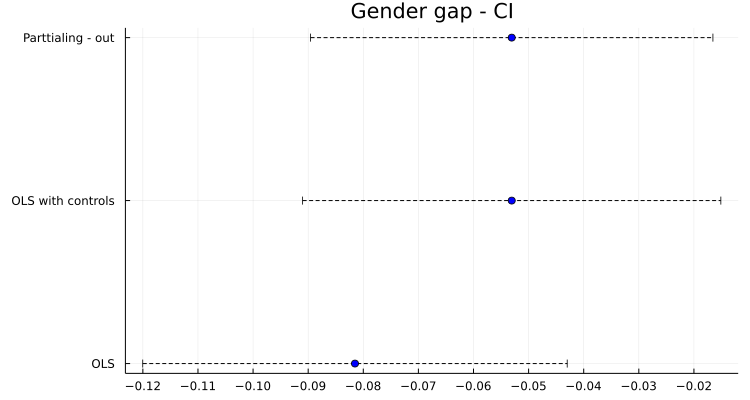

In [33]:
scatter( T[!,2], T[!,1], label = "", xerrors = xerror, 
        xtick = -1:0.01:1, linestyle = :dash, seriescolor=:blue)

plot!(size=(750,400), title="Gender gap - CI")



# Graph: Experience profile and log-wage for college graduated

In [34]:
z_clg = filter(row -> (row.clg == 1), data)


bd = copy(z_clg)

data_plot = bd[!,[:exp1 , :lwage]]
sort!(data_plot)
delete!(data_plot, [1629,1630,1631,1632,1633,1634,1635,1636])
data_plot.group = repeat(1:22, inner=74)

bins = combine(groupby(data_plot, [:group]), [:exp1,:lwage]  .=> mean; renamecols=false)

,group,exp1,lwage
,Int64,Float64,Float64
1,1,1.0,2.57507
2,2,1.0,3.16671
3,3,1.63514,3.03118
4,4,2.0,3.07621
5,5,2.60811,2.98413
6,6,3.0,3.1791
7,7,3.71622,2.98803
8,8,4.16216,3.21075
9,9,5.0,3.00994


In [35]:
quartic  = @formula(lwage ~  exp1+exp2+exp3+exp4)
quadratic = @formula(lwage ~  exp1+exp2)


z_clg[!, :quartic] = predict(lm(quartic , z_clg))
z_clg[!, :quadratic] = predict(lm(quadratic , z_clg))

1636-element Vector{Float64}:
 3.127468885180004
 3.2384174376676853
 3.2720412135685133
 2.9994257696131394
 3.0684626262688184
 3.2708638860127315
 3.1905407450145926
 3.1449086164294
 3.2682424217731394
 3.2384174376676853
 3.1905407450145926
 3.127468885180004
 3.176444546346694
 ⋮
 3.1449086164294
 3.176444546346694
 3.023552566025532
 3.089245890099713
 3.1449086164294
 3.2708638860127315
 3.207148316878421
 3.259655960712456
 3.089245890099713
 3.2517132089514944
 3.176444546346694
 3.161233836818297

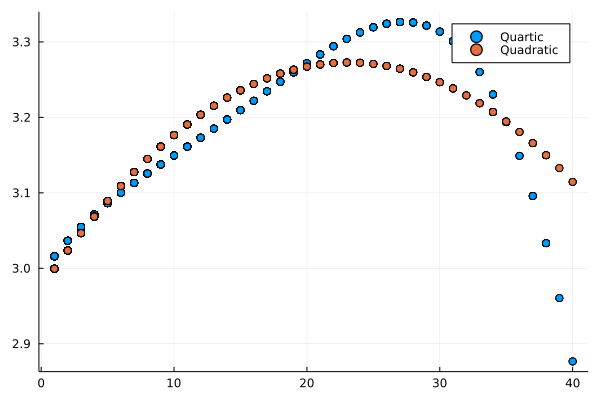

In [36]:
scatter(z_clg[!,:exp1], z_clg[!,:quartic], mode="-", label="Quartic")
scatter!(z_clg[!,:exp1], z_clg[!,:quadratic], mode="--", label="Quadratic")

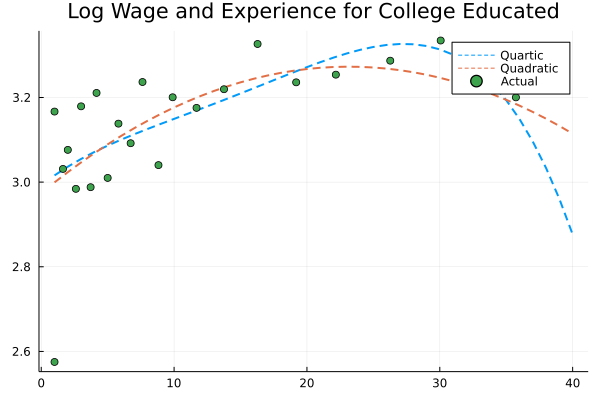

In [37]:
plot(z_clg[!,:exp1], z_clg[!,:quartic], seriestype = :line, linestyle = :dash, label = "Quartic",
    lw = 2)
plot!(z_clg[!,:exp1], z_clg[!,:quadratic], seriestype = :line, linestyle = :dash, label = "Quadratic",
        lw = 2)
scatter!(bins[!,:exp1], bins[!,:lwage], mode="--", label="Actual")
plot!(title = "Log Wage and Experience for College Educated")